<a href="https://colab.research.google.com/github/ThisGuy245/AI-Tasks/blob/main/AI_Task_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving AIGPAssignmentTestData.csv to AIGPAssignmentTestData (3).csv
Epoch [10/100], Loss: 0.1893
Epoch [20/100], Loss: 0.0432
Epoch [30/100], Loss: 0.0195
Epoch [40/100], Loss: 0.0113
Epoch [50/100], Loss: 0.0074
Epoch [60/100], Loss: 0.0051
Epoch [70/100], Loss: 0.0037
Epoch [80/100], Loss: 0.0028
Epoch [90/100], Loss: 0.0021
Epoch [100/100], Loss: 0.0017
Test Accuracy: 1.0000


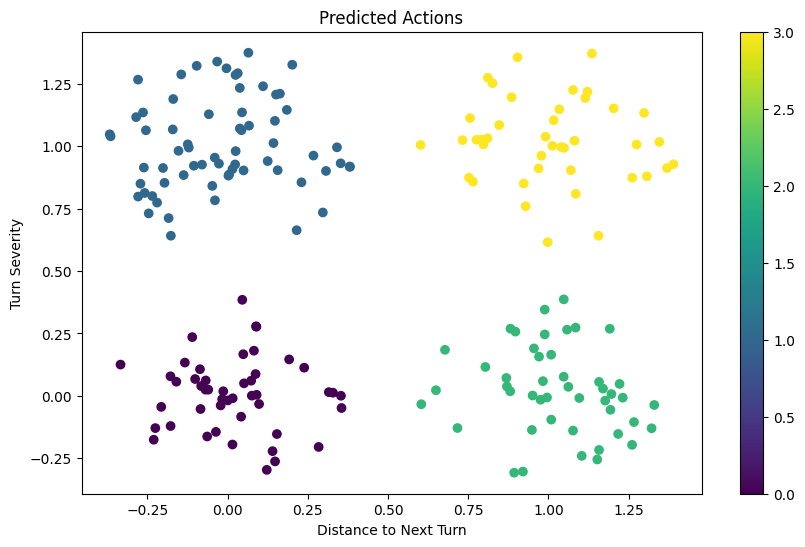

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Load data from CSV file
def load_data():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    data = pd.read_csv(file_name)
    # Adjust column names as per the dataset
    data.columns = ['Distance', 'Severity', 'Accelerate', 'Brake', 'Maintain', 'PitStop']
    X = data[['Distance', 'Severity']]
    y = data[['Accelerate', 'Brake', 'Maintain', 'PitStop']]
    return X, y



# Convert data to PyTorch tensors
def prepare_data(X, y):
    X = torch.tensor(X.values, dtype=torch.float32)
    y = torch.tensor(y.values, dtype=torch.float32)
    return X, y

# Split data into training and testing sets
def split_data(X, y, train_size=0.8):
    split_idx = int(train_size * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    return X_train, X_test, y_train, y_test

# Define the neural network
class RaceCarANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RaceCarANN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.output(x)
        return x

# Train the model
def train_model(model, X_train, y_train, num_epochs=100, batch_size=32):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]

            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted = torch.max(test_outputs, 1)
        _, actual = torch.max(y_test, 1)
        accuracy = (predicted == actual).float().mean()
    return accuracy

# Visualize results
def visualize_results(X_test, predicted):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted, cmap='viridis')
    plt.colorbar()
    plt.xlabel('Distance to Next Turn')
    plt.ylabel('Turn Severity')
    plt.title('Predicted Actions')
    plt.show()

# Main function
def main():
    X, y = load_data()
    X, y = prepare_data(X, y)
    X_train, X_test, y_train, y_test = split_data(X, y)

    model = RaceCarANN(input_size=2, hidden_size=64, output_size=4)
    train_model(model, X_train, y_train)

    accuracy = evaluate_model(model, X_test, y_test)
    print(f'Test Accuracy: {accuracy.item():.4f}')

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted = torch.max(test_outputs, 1)

    visualize_results(X_test, predicted)

if __name__ == "__main__":
    main()
